In [ ]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-rc0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
!pip install Pillow

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-rc0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-rc0
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importation des packages
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os


from pathlib import Path
import tensorflow as tf

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

import PIL
from PIL import Image


In [ ]:
#pour le train :
import csv
train1= Path('/content/drive/MyDrive/Dataset/Train')

dirs1=train1.glob('*')


x_train=[]
y_train=[]

for d1 in dirs1:

    y_label1 = str(d1.name)

    print(y_label1)

    cnt = 0

    print(d1)

    # recupe les images de chaque dossier (chaque stade du dossier train)

    for img_path in d1.glob("*.jpeg"):
        # print(img_path)
        img = image.load_img(img_path, target_size=(100, 100))
        img_array = image.img_to_array(img)
        x_train.append(img_array)
        y_train.append(y_label1)
        cnt += 1

    print(cnt)



import numpy as np

x_train=np.array(x_train)
y_train=np.array(y_train)




print("maintenant pour les donnees test")


#pour le dossier test

test1= Path('/content/drive/MyDrive/Dataset/Test')

dirs2= test1.glob("*")

#pour le test
x_test=[]
y_test=[]

for d2 in dirs2:
  y_label2=str(d2.name)

  print(y_label2)

  cnt2=0

  print(d2)

  for im_path in d2.glob("*.jpeg"):

    img2=image.load_img(im_path, target_size=(100,100))
    img2_array=image.img_to_array(img2)
    x_test.append(img2_array)
    y_test.append(y_label2)

    cnt2+=1

  print(cnt2)


import numpy as np

x_test=np.array(x_train)
y_test=np.array(y_train)


4
/content/drive/MyDrive/Dataset/Train/4
567
2
/content/drive/MyDrive/Dataset/Train/2
4234
1
/content/drive/MyDrive/Dataset/Train/1
1955
0
/content/drive/MyDrive/Dataset/Train/0


In [ ]:
print ("x_train.shape:" ,x_train.shape)
print ("x_test.shape:" ,x_test.shape)

x_train.shape: (28123, 100, 100, 3)
x_test.shape: (28123, 100, 100, 3)


In [ ]:
# Flatten the data
N, H, W, Z = x_train.shape
D = H * W
x_train = x_train.reshape(-1, D)
x_test = x_test.reshape(-1, D)

In [ ]:
print ("x_train.shape:" ,x_train.shape)
print ("x_test.shape:" ,x_test.shape)

x_train.shape: (84369, 10000)
x_test.shape: (84369, 10000)


In [ ]:
# Dimensionality of the latent space
latent_dim = np.array(100,100,3)

Pillow version:  7.1.2


In [ ]:
# Defining the generator model
def build_generator(latent_dim):
  i = Input(shape=(latent_dim,))
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(i)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(1024, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(D, activation='tanh')(x)

  model = Model(i, x)
  return model

In [ ]:
# Defining the discriminator model
def build_discriminator(img_size):
    i = Input(shape=(img_size,))
    x = Dense(512, activation=LeakyReLU(alpha=0.2))(i)
    x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(i, x)
    return model

In [ ]:
# Compile both models in preparation for training

# Build and compile the discriminator
discriminator = build_discriminator(D)
discriminator.compile ( loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile the combined model
generator = build_generator(latent_dim)

In [ ]:
generator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               25856     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1024)              5253

In [ ]:
discriminator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense (Dense)               (None, 512)               5120512   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 5,252,097
Trainable params: 5,252,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create an input to represent noise sample from latent space
z = Input(shape=(latent_dim,))

z.shape
print(z)

KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


Pillow version:  7.1.2
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


(512, 786, 3)

In [ ]:
# Pass noise through generator to get an image
img = generator(z)

ValueError: ignored

In [ ]:
img

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'model_1')>

In [ ]:
# Make sure only the generator is trained
discriminator.trainable = False

In [ ]:
# The true output is fake, but we label them real!
# Passing the output of Generator to the Discriminator

fake_pred = discriminator(img)

TypeError: ignored

In [ ]:
# Create the combined model object
combined_model_gen = Model(z, fake_pred)

In [ ]:
# Compile the combined model
combined_model_gen.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

NameError: ignored

In [ ]:
# Config

batch_size = 32
epochs = 1000
sample_period = 200 # every `sample_period` steps generate and save some data"

In [ ]:
# Create batch labels to use when calling train_on_batch
ones = np.ones(batch_size)
zeros = np.zeros(batch_size)

# Store the losses
d_losses = []
g_losses = []

# Create a folder to store generated images
if not os.path.exists('gan_images'):
  os.makedirs('gan_images')

In [ ]:
# A function to generate a grid of random samples from the generator and save them to a file

def sample_images(epoch):
  rows, cols = 5, 5
  noise = np.array(Image.open('/content/drive/MyDrive/Dataset/Test/0/13_left.jpeg'))
  imgs = generator.predict(noise)

  # Rescale images 0 - 1
  imgs = 0.5 * imgs + 0.5

  fig, axs = plt.subplots(rows, cols)
  idx = 0
  for i in range(rows):
    for j in range(cols):
      axs[i,j].imshow(imgs[idx].reshape(H, W), cmap='gray')
      axs[i,j].axis('off')
      idx += 1
  fig.savefig("gan_images/%d.png" % epoch)
  plt.close()

In [ ]:
### Train the GAN

In [ ]:
# Main training loop
for epoch in range(epochs):
  ###########################
  ### Train discriminator ###
  ###########################
  
  # Select a random batch of images
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  real_imgs = x_train[idx]
  
  # Generate fake images
  noise = np.array(Image.open('/content/drive/MyDrive/Dataset/Test/0/13_left.jpeg'))

  fake_imgs = generator.predict(noise)
  
  # Train the discriminator
  # both loss and accuracy are returned
  d_loss_real, d_acc_real = discriminator.train_on_batch(real_imgs, ones)
  d_loss_fake, d_acc_fake = discriminator.train_on_batch(fake_imgs, zeros)
  d_loss = 0.5 * (d_loss_real + d_loss_fake)
  d_acc  = 0.5 * (d_acc_real + d_acc_fake)
  
  
  #######################
  ### Train generator ###
  #######################
  
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model_gen.train_on_batch(noise, ones)
  
  # do it again!
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model_gen.train_on_batch(noise, ones)
  
  # Save the losses
  d_losses.append(d_loss)
  g_losses.append(g_loss)
  
  if epoch % 100 == 0:
    print(f"epoch: {epoch+1}/{epochs}, d_loss: {d_loss:.2f}, \
      d_acc: {d_acc:.2f}, g_loss: {g_loss:.2f}")
  
  if epoch % sample_period == 0:
    sample_images(epoch)

ValueError: ignored

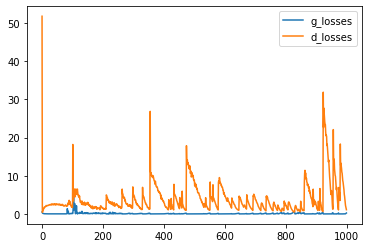

In [ ]:
plt.plot(g_losses, label='g_losses')
plt.plot(d_losses, label='d_losses')
plt.legend()

In [ ]:
!ls gan_images

0.png  200.png	400.png  600.png  800.png


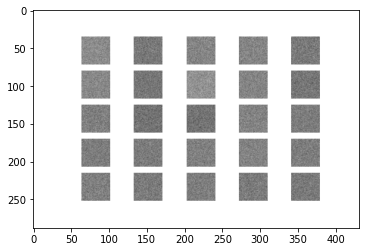

In [ ]:
from skimage.io import imread
a = imread('gan_images/0.png')
plt.imshow(a)

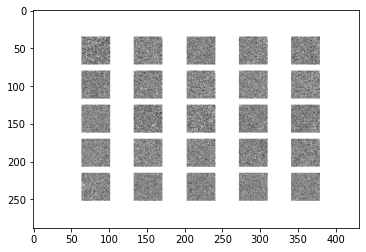

In [ ]:
a = imread('gan_images/200.png')
plt.imshow(a)

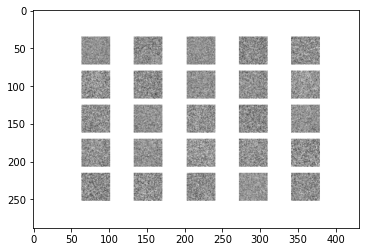

In [ ]:
a = imread('gan_images/400.png')
plt.imshow(a)

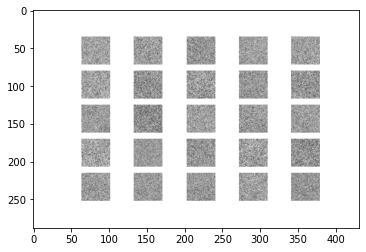

In [ ]:
a = imread('gan_images/600.png')
plt.imshow(a)

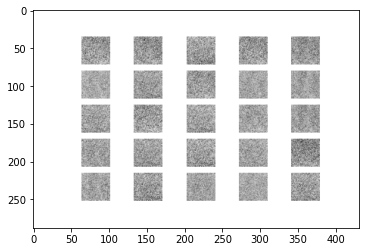

In [ ]:
a = imread('gan_images/800.png')
plt.imshow(a)

In [ ]:
a = imread('gan_images/29800.png')
plt.imshow(a)

In [ ]:
a = imread('gan_images/29400.png')
plt.imshow(a)

In [ ]:
a = imread('gan_images/29800.png')
plt.imshow(a)

In [ ]:
a = imread('gan_images/27200.png')
plt.imshow(a)

In [ ]:
a = imread('gan_images/15000.png')
plt.imshow(a)